In [1]:
import sys
sys.path.append("..")
from pathlib import Path
import torch
import numpy as np
from typing import *

from utils_glue import *
from pytorch_transformers import *

ROOT = Path("..")

vocab = BertTokenizer.from_pretrained("bert-base-uncased")

def load_model(src):
    SRC = ROOT / src
    if not SRC.exists():
        SRC = src
    config = BertConfig.from_pretrained(SRC)
    return BertForSequenceClassification.from_pretrained(SRC, from_tf=False,
                                                         config=config)

In [2]:
dataset = "coca"
model_src = "bert-base-uncased"

In [3]:
model = load_model(model_src)

In [4]:
embeddings = model.bert.embeddings.word_embeddings.weight

In [5]:
def norm(word):
    return torch.norm(embeddings[vocab.vocab[word]])

### Load frequency info

In [6]:
import json
def load_frequency_info(dataset: str="sst"):
    with open(ROOT / f"info/train_freqs_{dataset}.json", "rt") as f:
        freqs = json.load(f)
    return freqs

In [7]:
freqs = load_frequency_info(dataset)

In [8]:
words = list([x for x in freqs.keys() if x not in ["[CLS]", "[SEP]"]])

Filter stop words that are too frequent

In [12]:
words = [w for w in words if w in vocab.vocab]

In [16]:
import matplotlib.pyplot as plt
def plot_stats(xfunc, yfunc, figsize=(7, 7), **settings):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set(**settings)
    ax.set_xlabel(xfunc.__name__)
    ax.set_ylabel(yfunc.__name__)
    ax.scatter(np.array([xfunc(w) for w in words]), np.array([yfunc(w) for w in words]))
    return fig, ax

In [24]:
import math
def freq(x):
    return freqs[x]

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc507ea5fd0>)

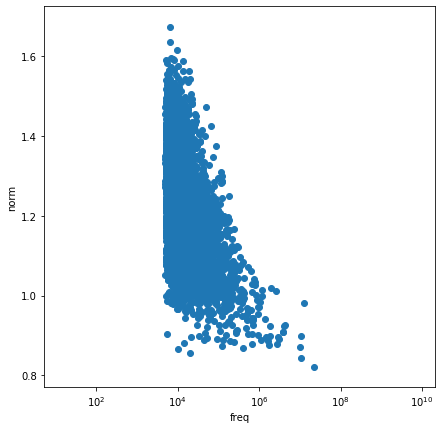

In [27]:
plot_stats(
    freq, norm,
    xscale="log",
)

In [20]:
def load_word_importance_info(dataset: str="sst"):
    with open(ROOT / f"info/word_positivities_{dataset}.json", "rt") as f:
        retval = json.load(f)
    return retval

In [21]:
word_importances = load_word_importance_info()

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc507e225d0>)

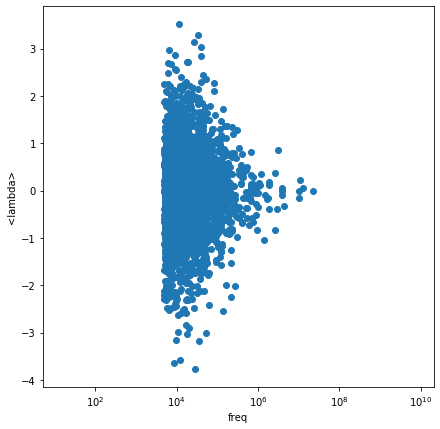

In [29]:
plot_stats(
    freq, lambda x: word_importances.get(x, 0),
    xscale='log'
)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc508073b50>)

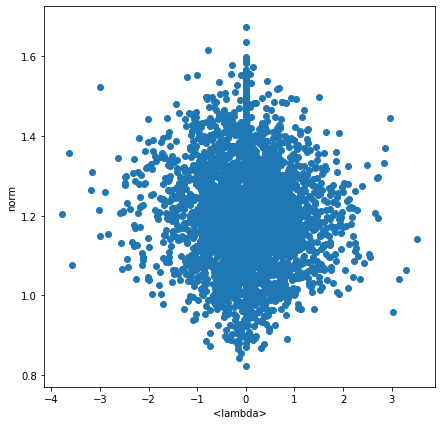

In [23]:
plot_stats(
    lambda x: word_importances.get(x, 0), norm
)